<a href="https://colab.research.google.com/github/shohelpramanik1/Age-Detection/blob/master/Age_Estimating_using_SIC_OF_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clone or upload dataset. Original dataset link: http://aicip.eecs.utk.edu/wiki/UTKFace

In [1]:
!git clone https://github.com/laxmimerit/Image-Dataset-for-Age-Prediction.git

Cloning into 'Image-Dataset-for-Age-Prediction'...
remote: Enumerating objects: 47107, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 47107 (delta 0), reused 2 (delta 0), pack-reused 47104
Receiving objects: 100% (47107/47107), 1.37 GiB | 17.29 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (24110/24110), done.


KTrain for data preprocessing.

In [2]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 1.2 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 981 kB 35.2 MB/s 
     |████████████████████████████████| 263 kB 69.7 MB/s 
     |████████████████████████████████| 2.8 MB 50.9 MB/s 
     |████████████████████████████████| 1.2 MB 56.9 MB/s 
     |████████████████████████████████| 468 kB 63.5 MB/s 
     |████████████████████████████████| 880 kB 60.6 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
     |████████████████████████████████| 596 kB 70.5 MB/s 
     |████████████████████████████████| 3.3 MB 71.4 MB/s 
  Created wheel for ktrain: filename=ktrain-0.31.2-py3-none-any.whl size=25313063 sha256=5ec822901176ab27f3c2c10e97c4c72e31da8aba22ad76aa566d72b1d410e27f
  Stored in directory: /root/.cache/pip/wheels/0a/b3/dd/512a01ea0b4f31d96163518b58361bb72d3bcb916d291052e7
  Cr

Library installing

In [3]:
%matplotlib inline
import os
import ktrain
from ktrain import vision as visn


Find regular expression

In [4]:
import re
pattern = r'([^/]+)_\d+_\d+_\d+.jpg$'

p=re.compile(pattern)
r=p.search('10_0_0_20170110220235233.jpg')
print(r.group(1))

10


In [5]:
DATADIR='/content/Image-Dataset-for-Age-Prediction/images'

In [6]:
(train_data, test_data, preproc) = visn.images_from_fname(DATADIR, pattern = pattern,
                      is_regression = True,
                      random_state=42)

/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:812: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/53__0_20170116184028385.jpg -  skipping this file
  "Could not extract target for %s -  skipping this file" % (fname)
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:812: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/24_0_1_20170116220224657 .jpg -  skipping this file
  "Could not extract target for %s -  skipping this file" % (fname)
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:812: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/61_1_20170109142408075.jpg -  skipping this file
  "Could not extract target for %s -  skipping this file" % (fname)
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:812: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/61_3_201701091505

['label']
       label
12304   12.0
6161    66.0
19807   60.0
21202   60.0
14941    7.0
['label']
       label
16139   35.0
14926   58.0
8979    21.0
12077   32.0
14568   33.0
Found 21690 validated image filenames.
Found 2411 validated image filenames.


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:871: UserWarning: is_regression=True was supplied but targets are strings - casting to floats
  "is_regression=True was supplied but targets are strings - casting to floats"
/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:723: UserWarning: Task is being treated as REGRESSION because either class_names argument was not supplied or is_regression=True. If this is incorrect, change accordingly.
  + "If this is incorrect, change accordingly."
/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:871: UserWarning: is_regression=True was supplied but targets are strings - casting to floats
  "is_regression=True was supplied but targets are strings - casting to floats"


In [7]:
visn.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized) [https://arxiv.org/abs/1512.03385]
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized) [https://arxiv.org/abs/1704.04861]
pretrained_mobilenetv3: MobileNetV3-Small Neural Network (pretrained on ImageNet)
mobilenetv3: MobileNetV3-Small Neural Network (randomly initialized) [https://arxiv.org/abs/1905.02244]
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized) [http://arxiv.org/abs/1512.00567]
pretrained_efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet)
efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet) [https://arxiv.org/abs/1905.11946]
pretrained_efficientnetb7: EfficientNet-B7 Neural Network (pretrained on ImageNet)
efficientnetb7: EfficientNet-B7 Neural Network (pre

In [8]:
model=visn.image_regression_model('pretrained_resnet50',
                                 train_data=train_data,
                                 val_data = test_data)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
94781440/94765736 [==============================] - 0s 0us/step
pretrained_resnet50 model created.


In [9]:
learner=ktrain.get_learner(model=model,
                           train_data = train_data,
                           val_data=test_data,
                           batch_size=64)

In [10]:
#learning rate = 1e-4

In [11]:
learner.fit_onecycle(1e-4,10)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/10
339/339 [==============================] - 347s 981ms/step - loss: 441.5173 - mae: 15.7714 - val_loss: 244.9442 - val_mae: 11.5815
Epoch 2/10
339/339 [==============================] - 329s 968ms/step - loss: 214.5776 - mae: 11.1131 - val_loss: 183.0051 - val_mae: 10.2491
Epoch 3/10
339/339 [==============================] - 328s 967ms/step - loss: 171.5651 - mae: 10.0322 - val_loss: 160.1758 - val_mae: 9.6135
Epoch 4/10
339/339 [==============================] - 327s 966ms/step - loss: 149.3714 - mae: 9.3654 - val_loss: 149.5166 - val_mae: 9.3740
Epoch 5/10
339/339 [==============================] - 327s 965ms/step - loss: 132.2882 - mae: 8.8014 - val_loss: 139.6644 - val_mae: 8.9898
Epoch 6/10
339/339 [==============================] - 327s 965ms/step - loss: 119.6621 - mae: 8.3571 - val_loss: 135.2568 - val_mae: 8.8289
Epoch 7/10
339/339 [==============================] - 328s 967ms/step - loss: 109.3055 - ma

In [12]:
learner.freeze(15)

learner.fit_onecycle(1e-4,10)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/10
339/339 [==============================] - 386s 1s/step - loss: 99.3177 - mae: 7.5978 - val_loss: 98.8145 - val_mae: 7.3222
Epoch 2/10
339/339 [==============================] - 374s 1s/step - loss: 43.0031 - mae: 5.0961 - val_loss: 120.7452 - val_mae: 8.1667
Epoch 3/10
339/339 [==============================] - 376s 1s/step - loss: 33.2387 - mae: 4.4318 - val_loss: 85.1645 - val_mae: 6.7316
Epoch 4/10
339/339 [==============================] - 377s 1s/step - loss: 32.2024 - mae: 4.3077 - val_loss: 78.2411 - val_mae: 6.4085
Epoch 5/10
339/339 [==============================] - 376s 1s/step - loss: 30.5423 - mae: 4.1963 - val_loss: 77.5617 - val_mae: 6.6135
Epoch 6/10
339/339 [==============================] - 377s 1s/step - loss: 26.6990 - mae: 3.8895 - val_loss: 69.1797 - val_mae: 6.0182
Epoch 7/10
339/339 [==============================] - 377s 1s/step - loss: 18.3283 - mae: 3.2160 - val_loss: 72.0953 - val_ma

In [13]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
338/338 [==============================] - 344s 1s/step - loss: 6.4591 - mae: 1.9454
Epoch 2/1024
338/338 [==============================] - 345s 1s/step - loss: 6.9710 - mae: 2.0119
Epoch 3/1024
338/338 [==============================] - 174s 511ms/step - loss: 40.4892 - mae: 4.3859


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


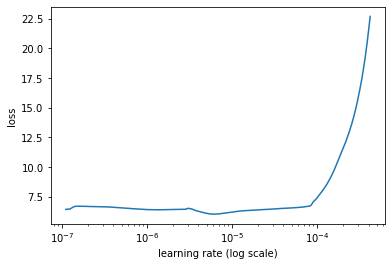

In [14]:
learner.lr_plot()

In [15]:
predictor = ktrain.get_predictor(learner.model,preproc)

In [16]:
test_data.filenames[20:30]

['22_1_1_20170116220930321.jpg',
 '40_0_0_20170117090946200.jpg',
 '31_0_1_20170117135511623.jpg',
 '24_1_0_20170104022714148.jpg',
 '22_1_2_20170116164534125.jpg',
 '27_1_3_20170119194422122.jpg',
 '37_0_1_20170113142027250.jpg',
 '27_1_2_20170109132133665.jpg',
 '88_1_0_20170120140102078.jpg',
 '23_0_4_20170117194045437.jpg']

In [33]:
def show_prediction(fname):
  fname=DATADIR + '/'+fname
  pred = round(predictor.predict_filename(fname)[0])
  actual=int(p.search(fname).group(1))
  visn.show_image(fname)
  print("Predicted Age: %s | Actual Age: %s" % (pred,actual))

Prediction of Age

Predicted Age: 24 | Actual Age: 23


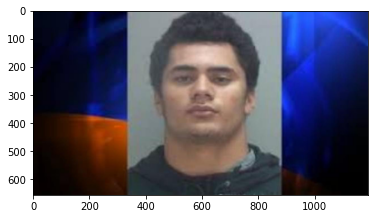

In [34]:
show_prediction('23_0_4_20170117194045437.jpg')

Real Time Age Prediction

Camera Captured for real time image

In [19]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


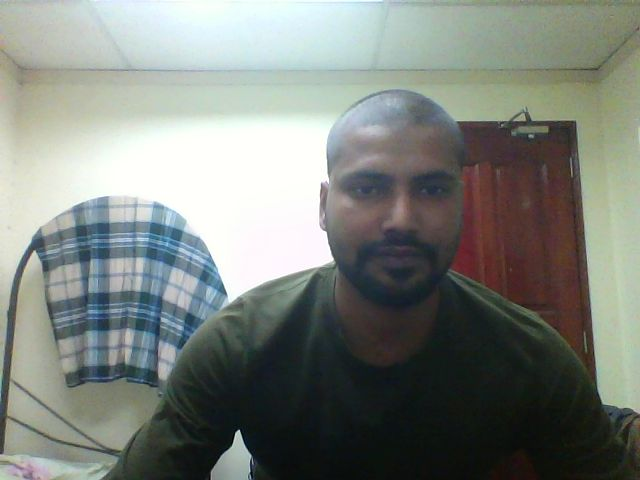

In [20]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [21]:
def real_prediction(fname):
  pred = round(predictor.predict_filename(fname)[0])
  visn.show_image(fname)
  print("Predicted Age: %s" % pred)

Predicted Age: 30


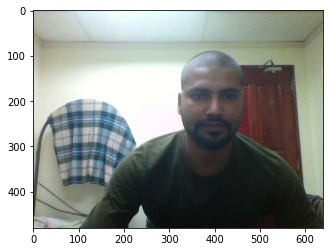

In [22]:
real_prediction('photo.jpg')

In [23]:
predictor.save('/content/Age_estimation')

In [24]:
!zip -r /content/Age_estimation.zip /content/Age_estimation

  adding: content/Age_estimation/ (stored 0%)
  adding: content/Age_estimation/tf_model.preproc (deflated 41%)
  adding: content/Age_estimation/tf_model.h5 (deflated 69%)
